<a href="https://colab.research.google.com/github/herysedra/ady_cov/blob/master/scr/tabilao/Tabilao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import matplotlib
import pickle

import pymc3 as pm
import theano.tensor as tt
import theano
import datetime
import time


import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
import pandas.testing as tm


tilyvoa = pd.read_csv("/content/drive/My Drive/data/tilyvoa.csv")


tilyvoafar = tilyvoa.groupby('Faritra')
tilyvoamdg = tilyvoafar.get_group('Madagasikara')
tilyvoamdg.set_index('Daty', inplace=True)

tilyvoamdg.index = pd.to_datetime(tilyvoamdg.index)


tilyvoatana = tilyvoafar.get_group('Antananarivo')
tilyvoatana.set_index('Daty', inplace=True)

tilyvoatana.index = pd.to_datetime(tilyvoatana.index)

tilyvoatoa = tilyvoafar.get_group('Toamasina')
tilyvoatoa.set_index('Daty', inplace=True)

tilyvoatoa.index = pd.to_datetime(tilyvoatoa.index)


path_to_save = '/content/drive/My Drive/sary/'
path_data = '/content/drive/My Drive/data/'

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


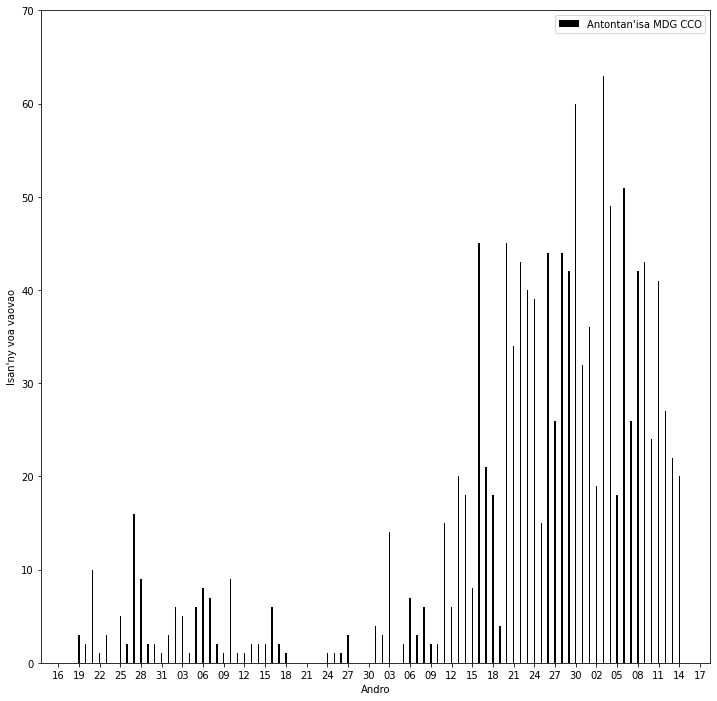

In [3]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.bar(tilyvoamdg.index, tilyvoamdg['Voatomb'], width = 0.2, color='black',label="Antontan'isa MDG CCO")


ax.set(xlabel ='Andro', ylabel = "Isan'ny voa vaovao")

date_form = DateFormatter("%d")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,70)
plt.savefig(path_to_save+'voavaozao.eps')

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


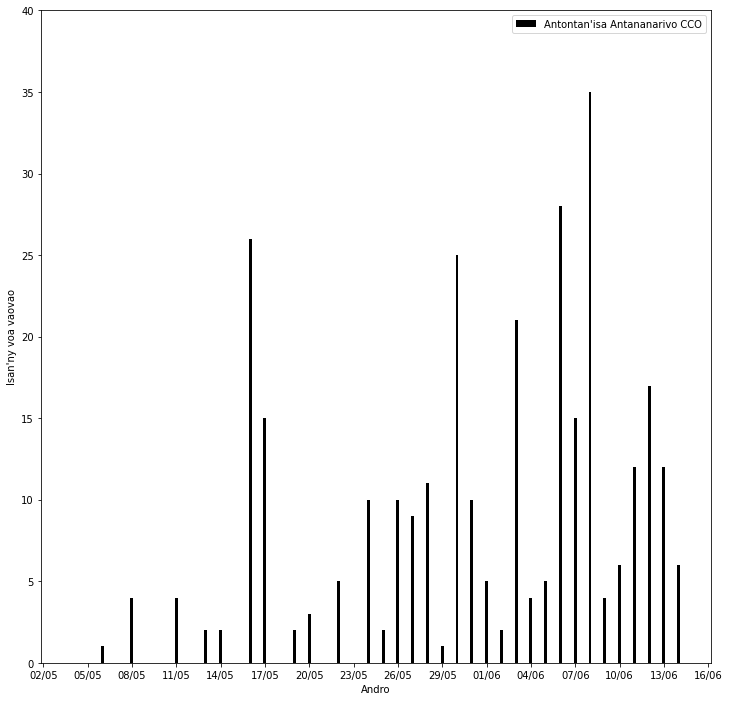

In [7]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.bar(tilyvoatana.index, tilyvoatana['Voatomb'], width=0.2, color='black',label="Antontan'isa Antananarivo CCO")


ax.set(xlabel ='Andro', ylabel = "Isan'ny voa vaovao")

date_form = DateFormatter("%d/%m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,40)
plt.savefig(path_to_save+'voavaotanazao.eps')

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


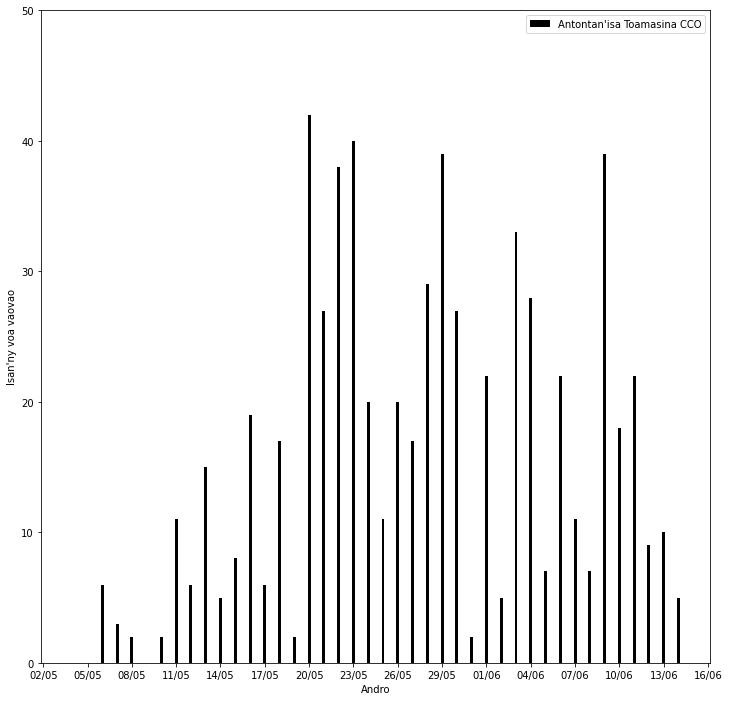

In [6]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.bar(tilyvoatoa.index, tilyvoatoa['Voatomb'], width=0.2, color='black',label="Antontan'isa Toamasina CCO")


ax.set(xlabel ='Andro', ylabel = "Isan'ny voa vaovao")

date_form = DateFormatter("%d/%m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,50)
plt.savefig(path_to_save+'voavaotoazao.eps')

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


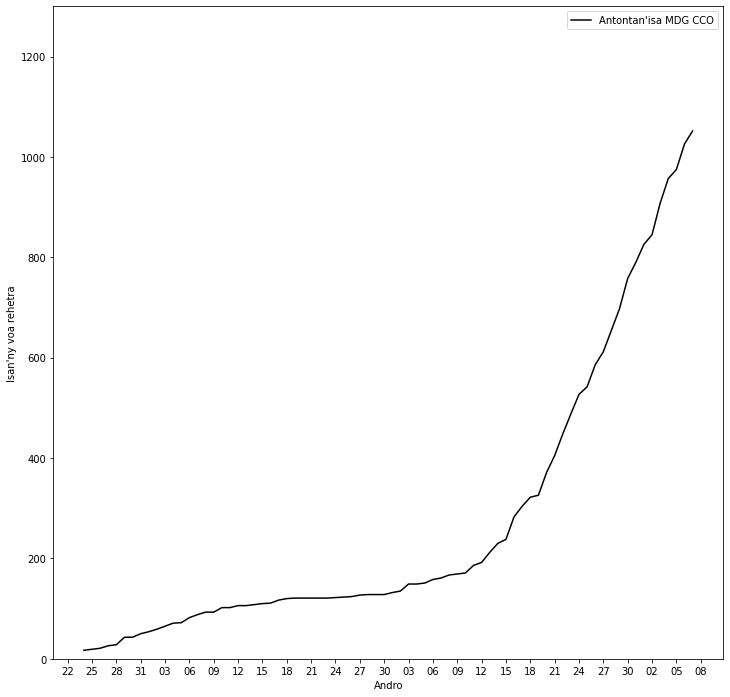

In [0]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.plot(tilyvoamdg.index, tilyvoamdg['Voareh tvm'], color='black',label="Antontan'isa MDG CCO")

ax.set(xlabel ='Andro', ylabel = "Isan'ny voa rehetra")

date_form = DateFormatter("%d")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,1300)
plt.savefig(path_to_save+'voarehzao.eps')

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


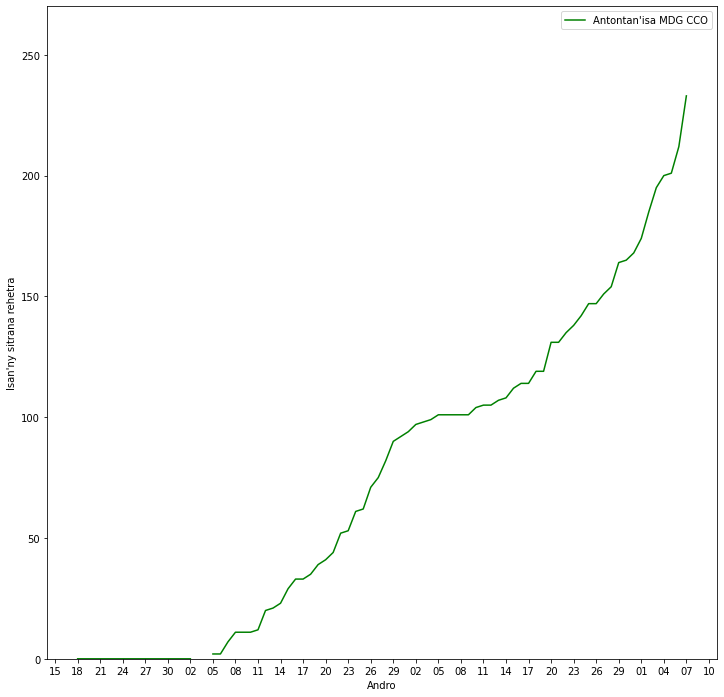

In [0]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.plot(tilyvoamdg.index, tilyvoamdg['Sitranreh tvm'], color='green',label="Antontan'isa MDG CCO")

ax.set(xlabel ='Andro', ylabel = "Isan'ny sitrana rehetra")

date_form = DateFormatter("%d")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,270)
plt.savefig(path_to_save+'sitrrehzao.eps')

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


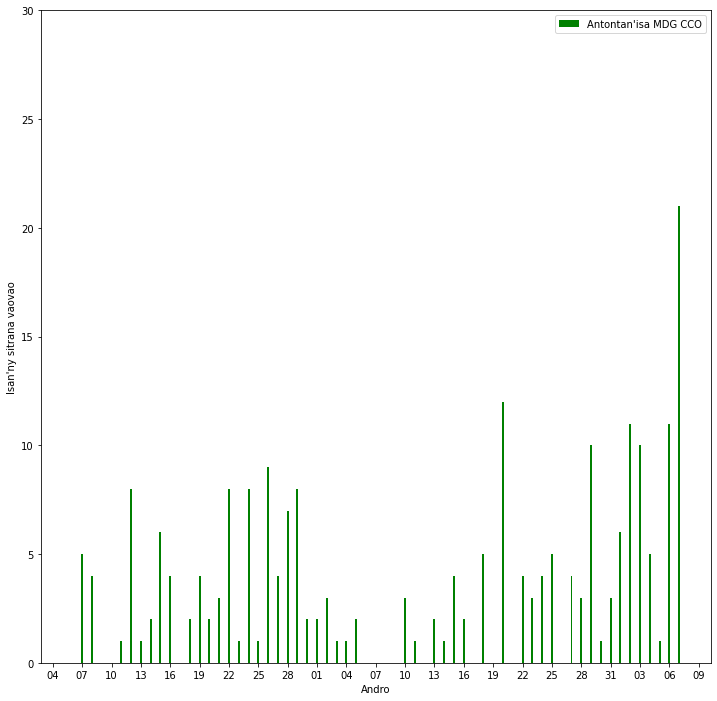

In [0]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.bar(tilyvoamdg.index, tilyvoamdg['Sitranvao tvm'], width=0.2, color='green',label="Antontan'isa MDG CCO")

ax.set(xlabel ='Andro', ylabel = "Isan'ny sitrana vaovao")

date_form = DateFormatter("%d")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,30)
plt.savefig(path_to_save+'sitrvaozao.eps')

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


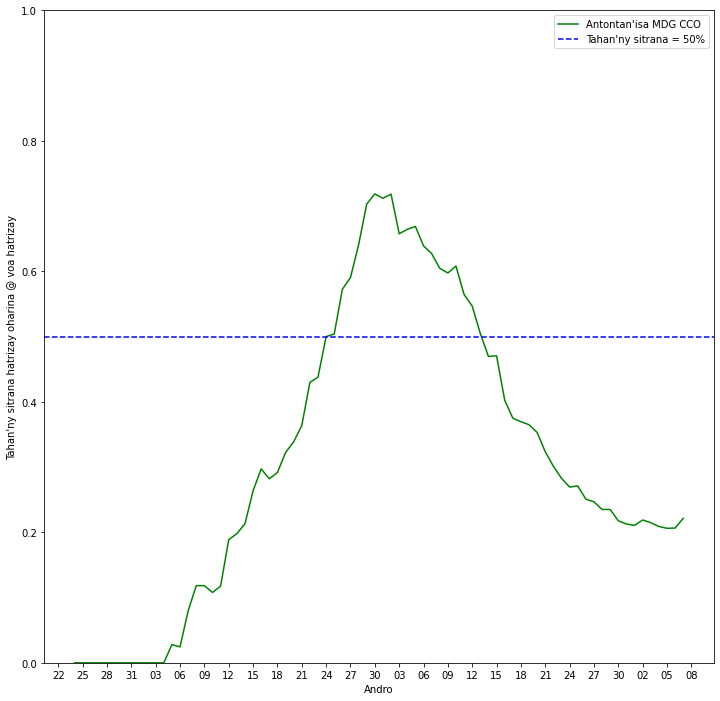

In [0]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.plot(tilyvoamdg.index, tilyvoamdg['Tahasitr'], color='green',label="Antontan'isa MDG CCO")
ax.axhline(y=0.5, color='b', linestyle='dashed', label ="Tahan'ny sitrana = 50%")

ax.set(xlabel ='Andro', ylabel = "Tahan'ny sitrana hatrizay oharina @ voa hatrizay")

date_form = DateFormatter("%d")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,1)
plt.savefig(path_to_save+'tahasitrzao.eps')

plt.show()

In [0]:
tilyvoamdg['Mombatahasitr'] = np.where(tilyvoamdg['Tahasitr']>=0.5, 'tahabe', 'tahakely')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
res = [tilyvoamdg['Tahasitr'][i + 1] - tilyvoamdg['Tahasitr'][i] for i in range(len(tilyvoamdg['Tahasitr'])-1)] 

In [0]:
tilyvoamdg.loc[tilyvoamdg['Mombatahasitr'] == 'tahabe']

,Loharano,Faritra,Tily ara-potoana,Tilytot tvm,Tilyvoatomb,Tily,Voa,Voatomb,Voavao tvm,Tsyvoa,Tsyvoatomb,Tilym,Voareh ilain,Voareh tvm,Sitranreh ilain,Sitranreh tvm,Sitranvao tvm,Nodimandry vao,Nodimandry reh,Tahatsv,Tahasitr,Mombatahasitr
Daty,,,,,,,,,,,,,,,,,,,,,,
2020-04-24,CCO,Madagasikara,NaN,NaN,43.0,43.0,1.0,1.0,1.0,38.0,38.0,43.0,122.0,122.0,65.0,61.0,8.0,NaN,NaN,0.8837,0.5000,tahabe
2020-04-25,FB-TVM,Madagasikara,NaN,NaN,82.0,NaN,NaN,1.0,1.0,NaN,81.0,NaN,NaN,123.0,NaN,62.0,1.0,NaN,NaN,0.9878,0.5041,tahabe
2020-04-26,FB-TVM,Madagasikara,NaN,3030.0,63.0,NaN,NaN,1.0,1.0,NaN,62.0,NaN,NaN,124.0,NaN,71.0,9.0,NaN,NaN,0.9841,0.5726,tahabe
2020-04-27,FB-TVM,Madagasikara,NaN,NaN,15.0,NaN,NaN,3.0,3.0,NaN,12.0,NaN,NaN,127.0,NaN,75.0,4.0,NaN,NaN,0.8000,0.5906,tahabe
2020-04-28,FB-TVM,Madagasikara,NaN,3065.0,20.0,NaN,NaN,0.0,0.0,NaN,20.0,NaN,NaN,128.0,NaN,82.0,7.0,NaN,NaN,1.0000,0.6406,tahabe
2020-04-29,FB-TVM,Madagasikara,NaN,3107.0,42.0,NaN,NaN,0.0,0.0,NaN,42.0,NaN,NaN,128.0,NaN,90.0,8.0,NaN,NaN,1.0000,0.7031,tahabe
2020-04-30,FB-TVM,Madagasikara,NaN,3228.0,121.0,NaN,NaN,0.0,0.0,NaN,121.0,NaN,NaN,128.0,NaN,92.0,2.0,NaN,NaN,1.0000,0.7188,tahabe
2020-05-01,FB-TVM,Madagasikara,NaN,3300.0,72.0,NaN,NaN,4.0,4.0,NaN,68.0,NaN,NaN,132.0,NaN,94.0,2.0,NaN,NaN,0.9444,0.7121,tahabe
2020-05-02,FB-TVM,Madagasikara,NaN,3393.0,93.0,NaN,NaN,3.0,3.0,NaN,90.0,NaN,NaN,135.0,NaN,97.0,3.0,NaN,NaN,0.9677,0.7185,tahabe


In [0]:
tilyvoamdg.loc[tilyvoamdg['Tahasitr'] == np.nanmax(tilyvoamdg['Tahasitr'])]

,Loharano,Faritra,Tily ara-potoana,Tilytot tvm,Tilyvoatomb,Tily,Voa,Voatomb,Voavao tvm,Tsyvoa,Tsyvoatomb,Tilym,Voareh ilain,Voareh tvm,Sitranreh ilain,Sitranreh tvm,Sitranvao tvm,Nodimandry vao,Nodimandry reh,Tahatsv,Tahasitr,Mombatahasitr
Daty,,,,,,,,,,,,,,,,,,,,,,
2020-04-30,FB-TVM,Madagasikara,NaN,3228.0,121.0,NaN,NaN,0.0,0.0,NaN,121.0,NaN,NaN,128.0,NaN,92.0,2.0,NaN,NaN,1.0,0.7188,tahabe


In [0]:
tilyvoamdg.loc[tilyvoamdg['Mombatahasitr'] == 'tahakely']

,Loharano,Faritra,Tily ara-potoana,Tilytot tvm,Tilyvoatomb,Tily,Voa,Voatomb,Voavao tvm,Tsyvoa,Tsyvoatomb,Tilym,Voareh ilain,Voareh tvm,Sitranreh ilain,Sitranreh tvm,Sitranvao tvm,Nodimandry vao,Nodimandry reh,Tahatsv,Tahasitr,Mombatahasitr
Daty,,,,,,,,,,,,,,,,,,,,,,
2020-03-18,CCO,Madagasikara,NaN,NaN,36.0,36.0,0.0,0.0,NaN,36.0,36.0,36.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,1.0000,NaN,tahakely
2020-03-19,CCO,Madagasikara,NaN,NaN,48.0,48.0,3.0,3.0,NaN,45.0,45.0,43.0,3.0,NaN,0.0,0.0,NaN,NaN,NaN,0.9375,NaN,tahakely
2020-03-20,CCO,Madagasikara,NaN,NaN,127.0,127.0,2.0,2.0,NaN,125.0,125.0,127.0,5.0,NaN,0.0,0.0,NaN,NaN,NaN,0.9843,NaN,tahakely
2020-03-21,CCO,Madagasikara,NaN,NaN,69.0,69.0,10.0,10.0,NaN,59.0,59.0,69.0,15.0,NaN,0.0,0.0,NaN,NaN,NaN,0.8551,NaN,tahakely
2020-03-22,CCO,Madagasikara,NaN,NaN,125.0,125.0,1.0,1.0,NaN,124.0,124.0,125.0,16.0,NaN,0.0,0.0,NaN,NaN,NaN,0.9920,NaN,tahakely
2020-03-23,CCO,Madagasikara,NaN,NaN,123.0,123.0,3.0,3.0,NaN,120.0,120.0,123.0,19.0,NaN,0.0,0.0,NaN,NaN,NaN,0.9756,NaN,tahakely
2020-03-24,CCO,Madagasikara,NaN,NaN,78.0,78.0,0.0,0.0,2.0,78.0,78.0,78.0,19.0,17.0,0.0,0.0,NaN,NaN,NaN,1.0000,0.0000,tahakely
2020-03-25,CCO,Madagasikara,NaN,NaN,120.0,120.0,5.0,5.0,2.0,115.0,115.0,120.0,24.0,19.0,0.0,0.0,NaN,NaN,NaN,0.9583,0.0000,tahakely
2020-03-26,CCO,Madagasikara,NaN,NaN,163.0,163.0,2.0,2.0,5.0,161.0,161.0,163.0,26.0,21.0,0.0,0.0,NaN,NaN,NaN,0.9877,0.0000,tahakely
